In [ ]:
import pandas as pd

feasible = pd.read_csv('../../../data/missions/validation/feasible.csv')

success = feasible[(feasible['HJ_success']==True) & (feasible['Naive_success']==True)].shape[0]
naive = feasible[(feasible['HJ_success']==False) & (feasible['Naive_success']==True)].shape[0]
hj = feasible[(feasible['HJ_success']==True) & (feasible['Naive_success']==False)].shape[0]
failure = feasible[(feasible['HJ_success']==False) & (feasible['Naive_success']==False)].shape[0]
total = feasible.shape[0]

print('Double Success:', success, f'({success/total:.1%})')
print('Naive Success only:', naive, f'({naive/total:.1%})')
print('HJ Sucess Only', hj, f'({hj/total:.1%})')
print('Double Failure', failure, f'({failure/total:.1%})')
print('Total Feasible Missions:', total)

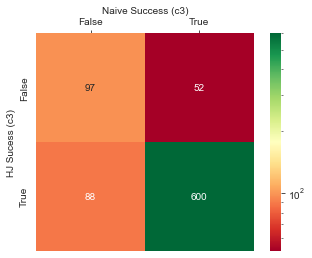

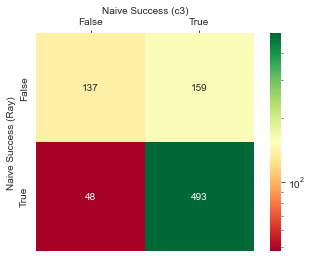

Naive Success Rate (c3): 77.90%
Naive Success Rate (Ray):64.64%


In [2]:
import pandas as pd

def plot_confusion_matrix(x, y, x_label, y_label):
    import seaborn as sns
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm

    confusion_matrix = pd.crosstab(x, y, rownames=[x_label], colnames=[y_label])

    ax = sns.heatmap(confusion_matrix, annot=True, cmap=plt.cm.RdYlGn, square=True, norm=LogNorm(), fmt='g')
    plt.tick_params(axis='both', which='major', labelbottom=False, bottom=False, top=True, labeltop=True)
    ax.xaxis.set_label_position('top')
    plt.show()


marius = pd.read_csv('../../../missions/validation/feasible.csv')
jerome = pd.read_csv('../../../results/evaluate_controller_2022_08_06_20_46_31 (all feasible, 6d timeout)/results.csv')

print()
plot_confusion_matrix(marius['HJ_success'], marius['Naive_success'], 'HJ Sucess (c3)', 'Naive Success (c3)')
plot_confusion_matrix(jerome['success'], marius['Naive_success'], 'Naive Success (Ray)', 'Naive Success (c3)')

print(f'Naive Success Rate (c3): {marius["Naive_success"].mean():.2%}')
print(f'Naive Success Rate (Ray):{jerome["success"].mean():.2%}')